In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
def read_merged(weather, year):
    return pd.read_csv('../../merged/merged_{}_{}.csv.gz'.format(weather, year)).drop(columns=['Unnamed: 0'])

In [3]:
tornados = read_merged('tornados', 2020)

In [4]:
tornados.head()

DATE  MONTH       LAT        LON  AVGDV  LLDV  MXDV  MXDV_HEIGHT  \
0  2020-01-01      1  47.78216 -121.44712     26    52    52            6   
1  2020-01-01      1  48.37113 -121.40435     38    50    78           10   
2  2020-01-01      1  38.92798 -121.88235     66    76   106            6   
3  2020-01-01      1  42.99992 -116.66901     95   174   174            3   
4  2020-01-01      1  43.23974 -115.43830     40    74    74            3   

   DEPTH  MAX_SHEAR  MAX_SHEAR_HEIGHT            COUNTY       STATE  \
0    8.0         17               6.2  Snohomish County  Washington   
1    9.1         26              10.3  Snohomish County  Washington   
2    5.4         46               6.1       Yolo County  California   
3    7.2         79               2.7     Owyhee County       Idaho   
4    5.3         31               3.0     Elmore County       Idaho   

   POWER_OUTAGE  
0         False  
1         False  
2         False  
3         False  
4         False

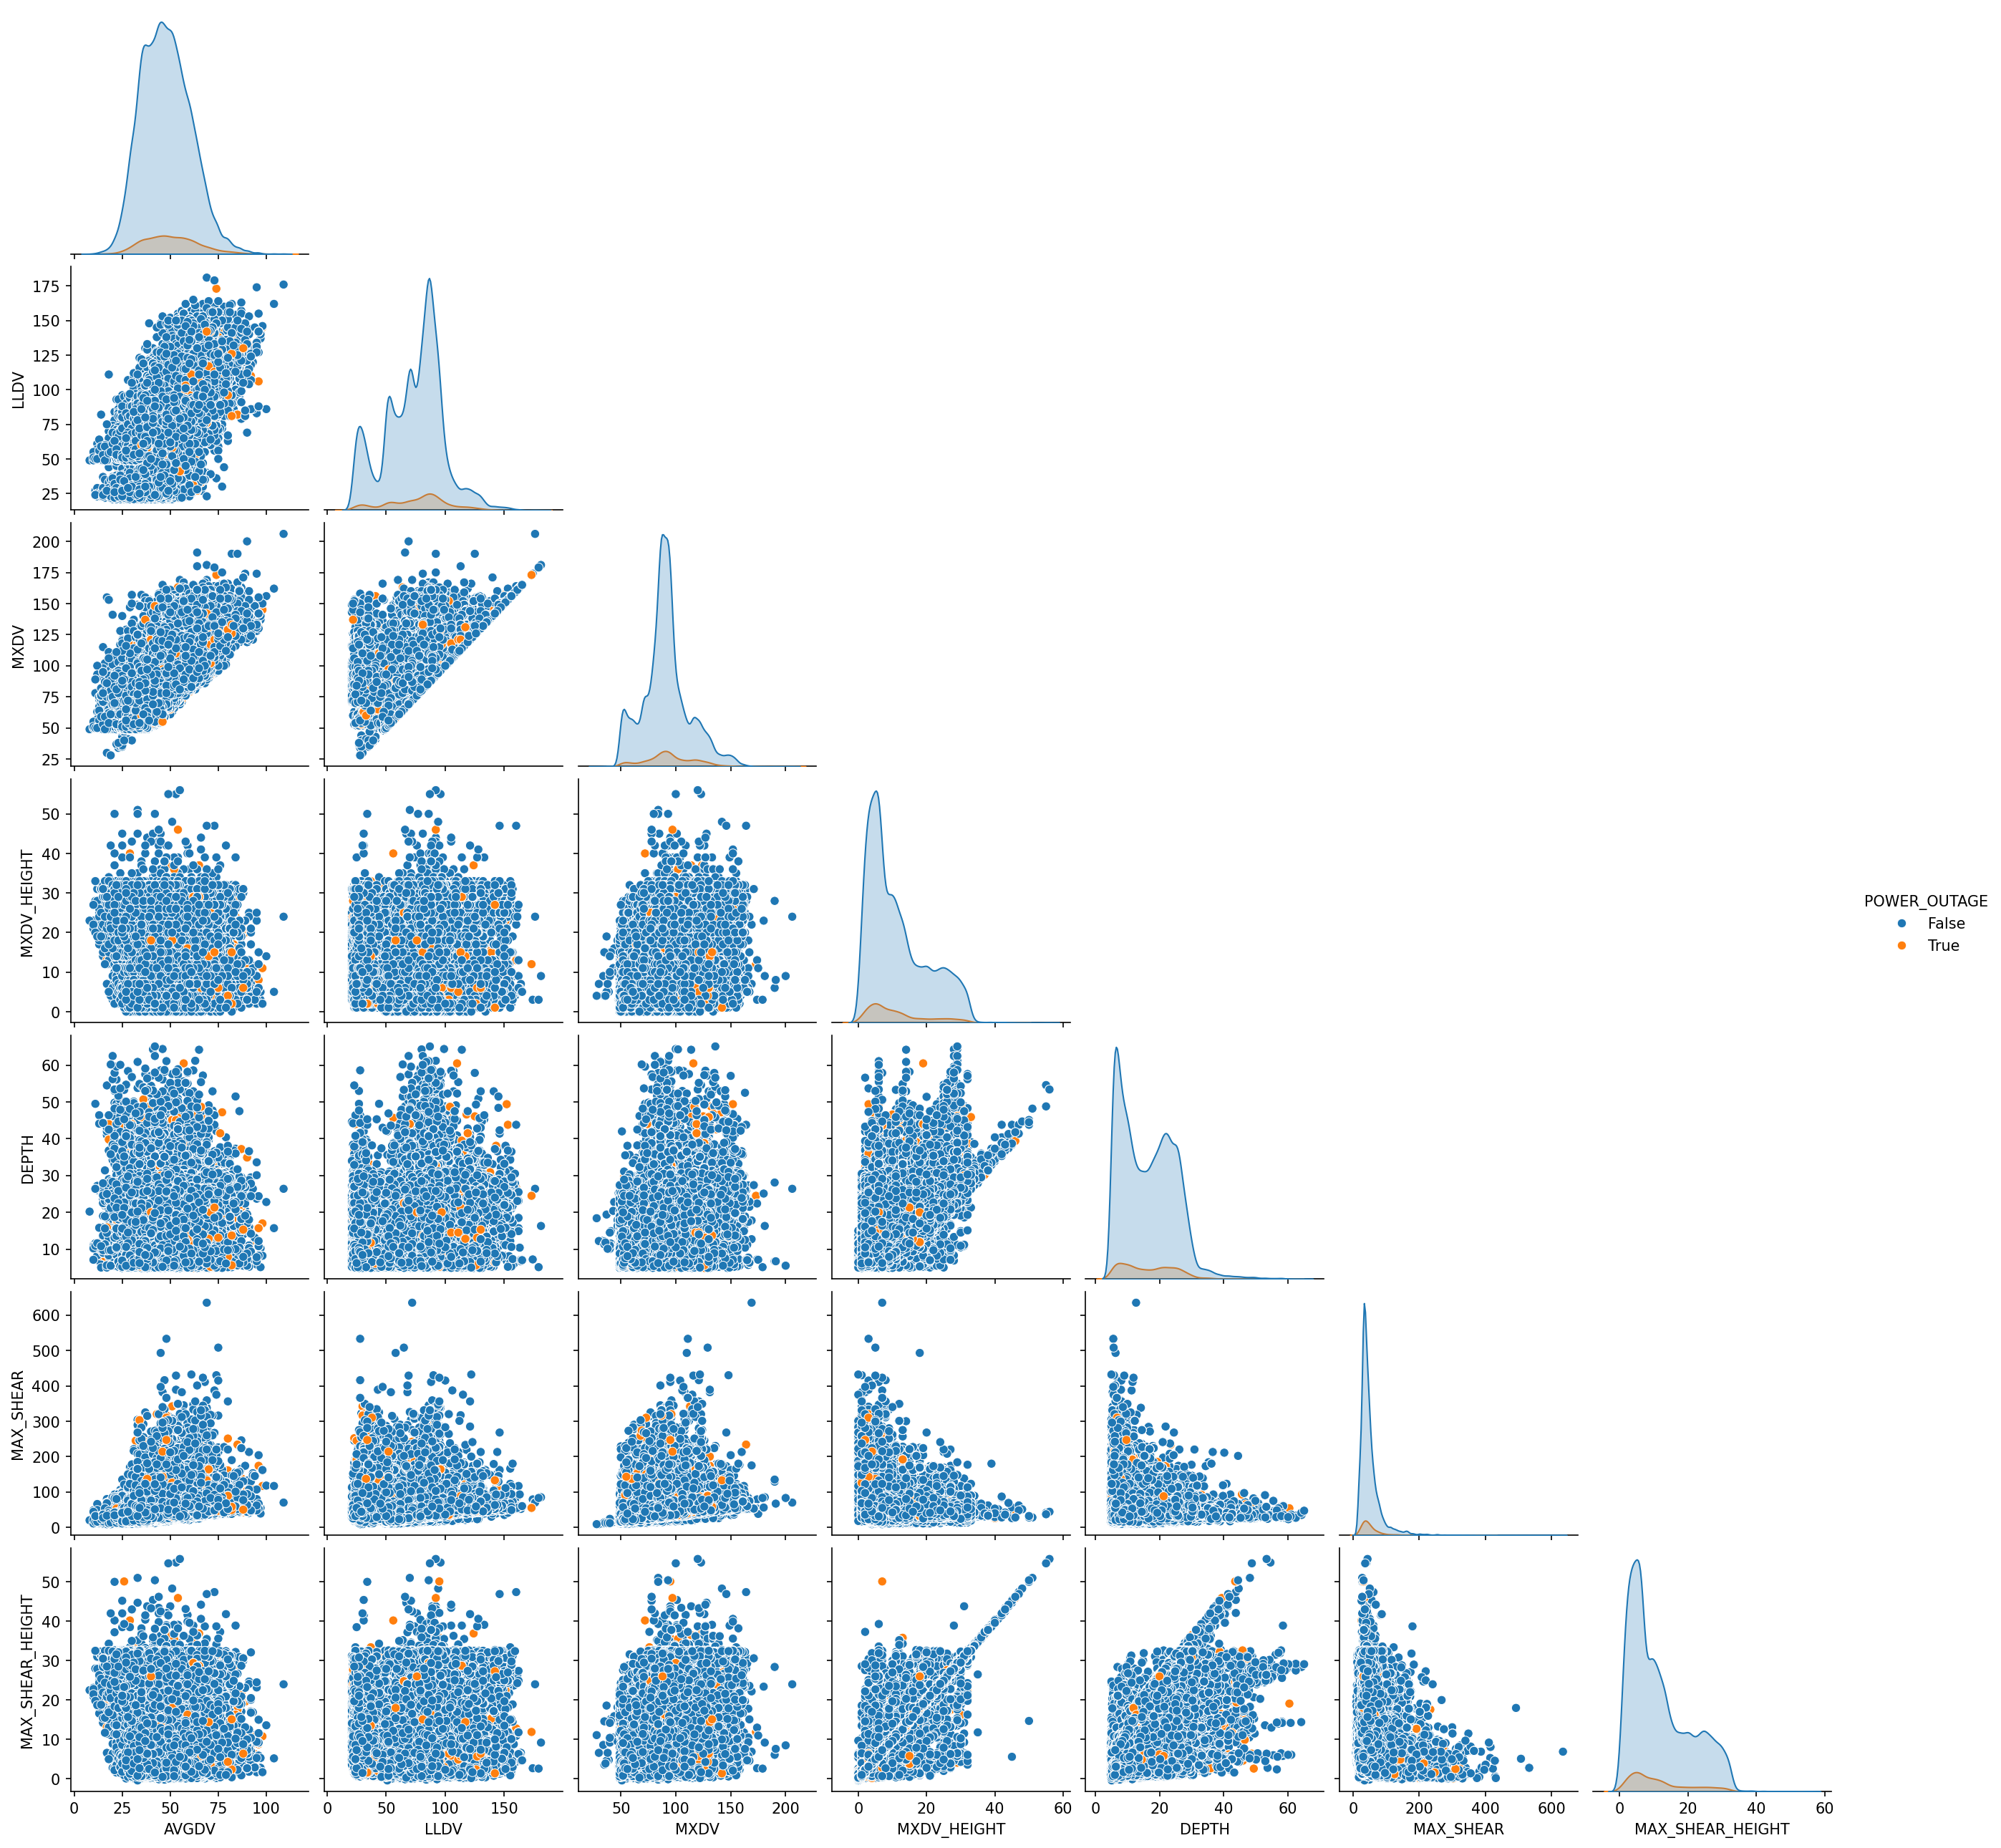

In [6]:
sns.pairplot(tornados, x_vars=['AVGDV', 'LLDV', 'MXDV', 'MXDV_HEIGHT', 'DEPTH', 'MAX_SHEAR','MAX_SHEAR_HEIGHT'],
                       y_vars=['AVGDV', 'LLDV', 'MXDV', 'MXDV_HEIGHT', 'DEPTH', 'MAX_SHEAR','MAX_SHEAR_HEIGHT'],
                       hue='POWER_OUTAGE', corner=True)

In [7]:
outage = tornados[tornados['POWER_OUTAGE']==True]
no_outage = tornados[tornados['POWER_OUTAGE']==False]
no_outage = no_outage.sample(n=len(outage))
tornados_balanced = pd.concat([outage, no_outage],axis=0)

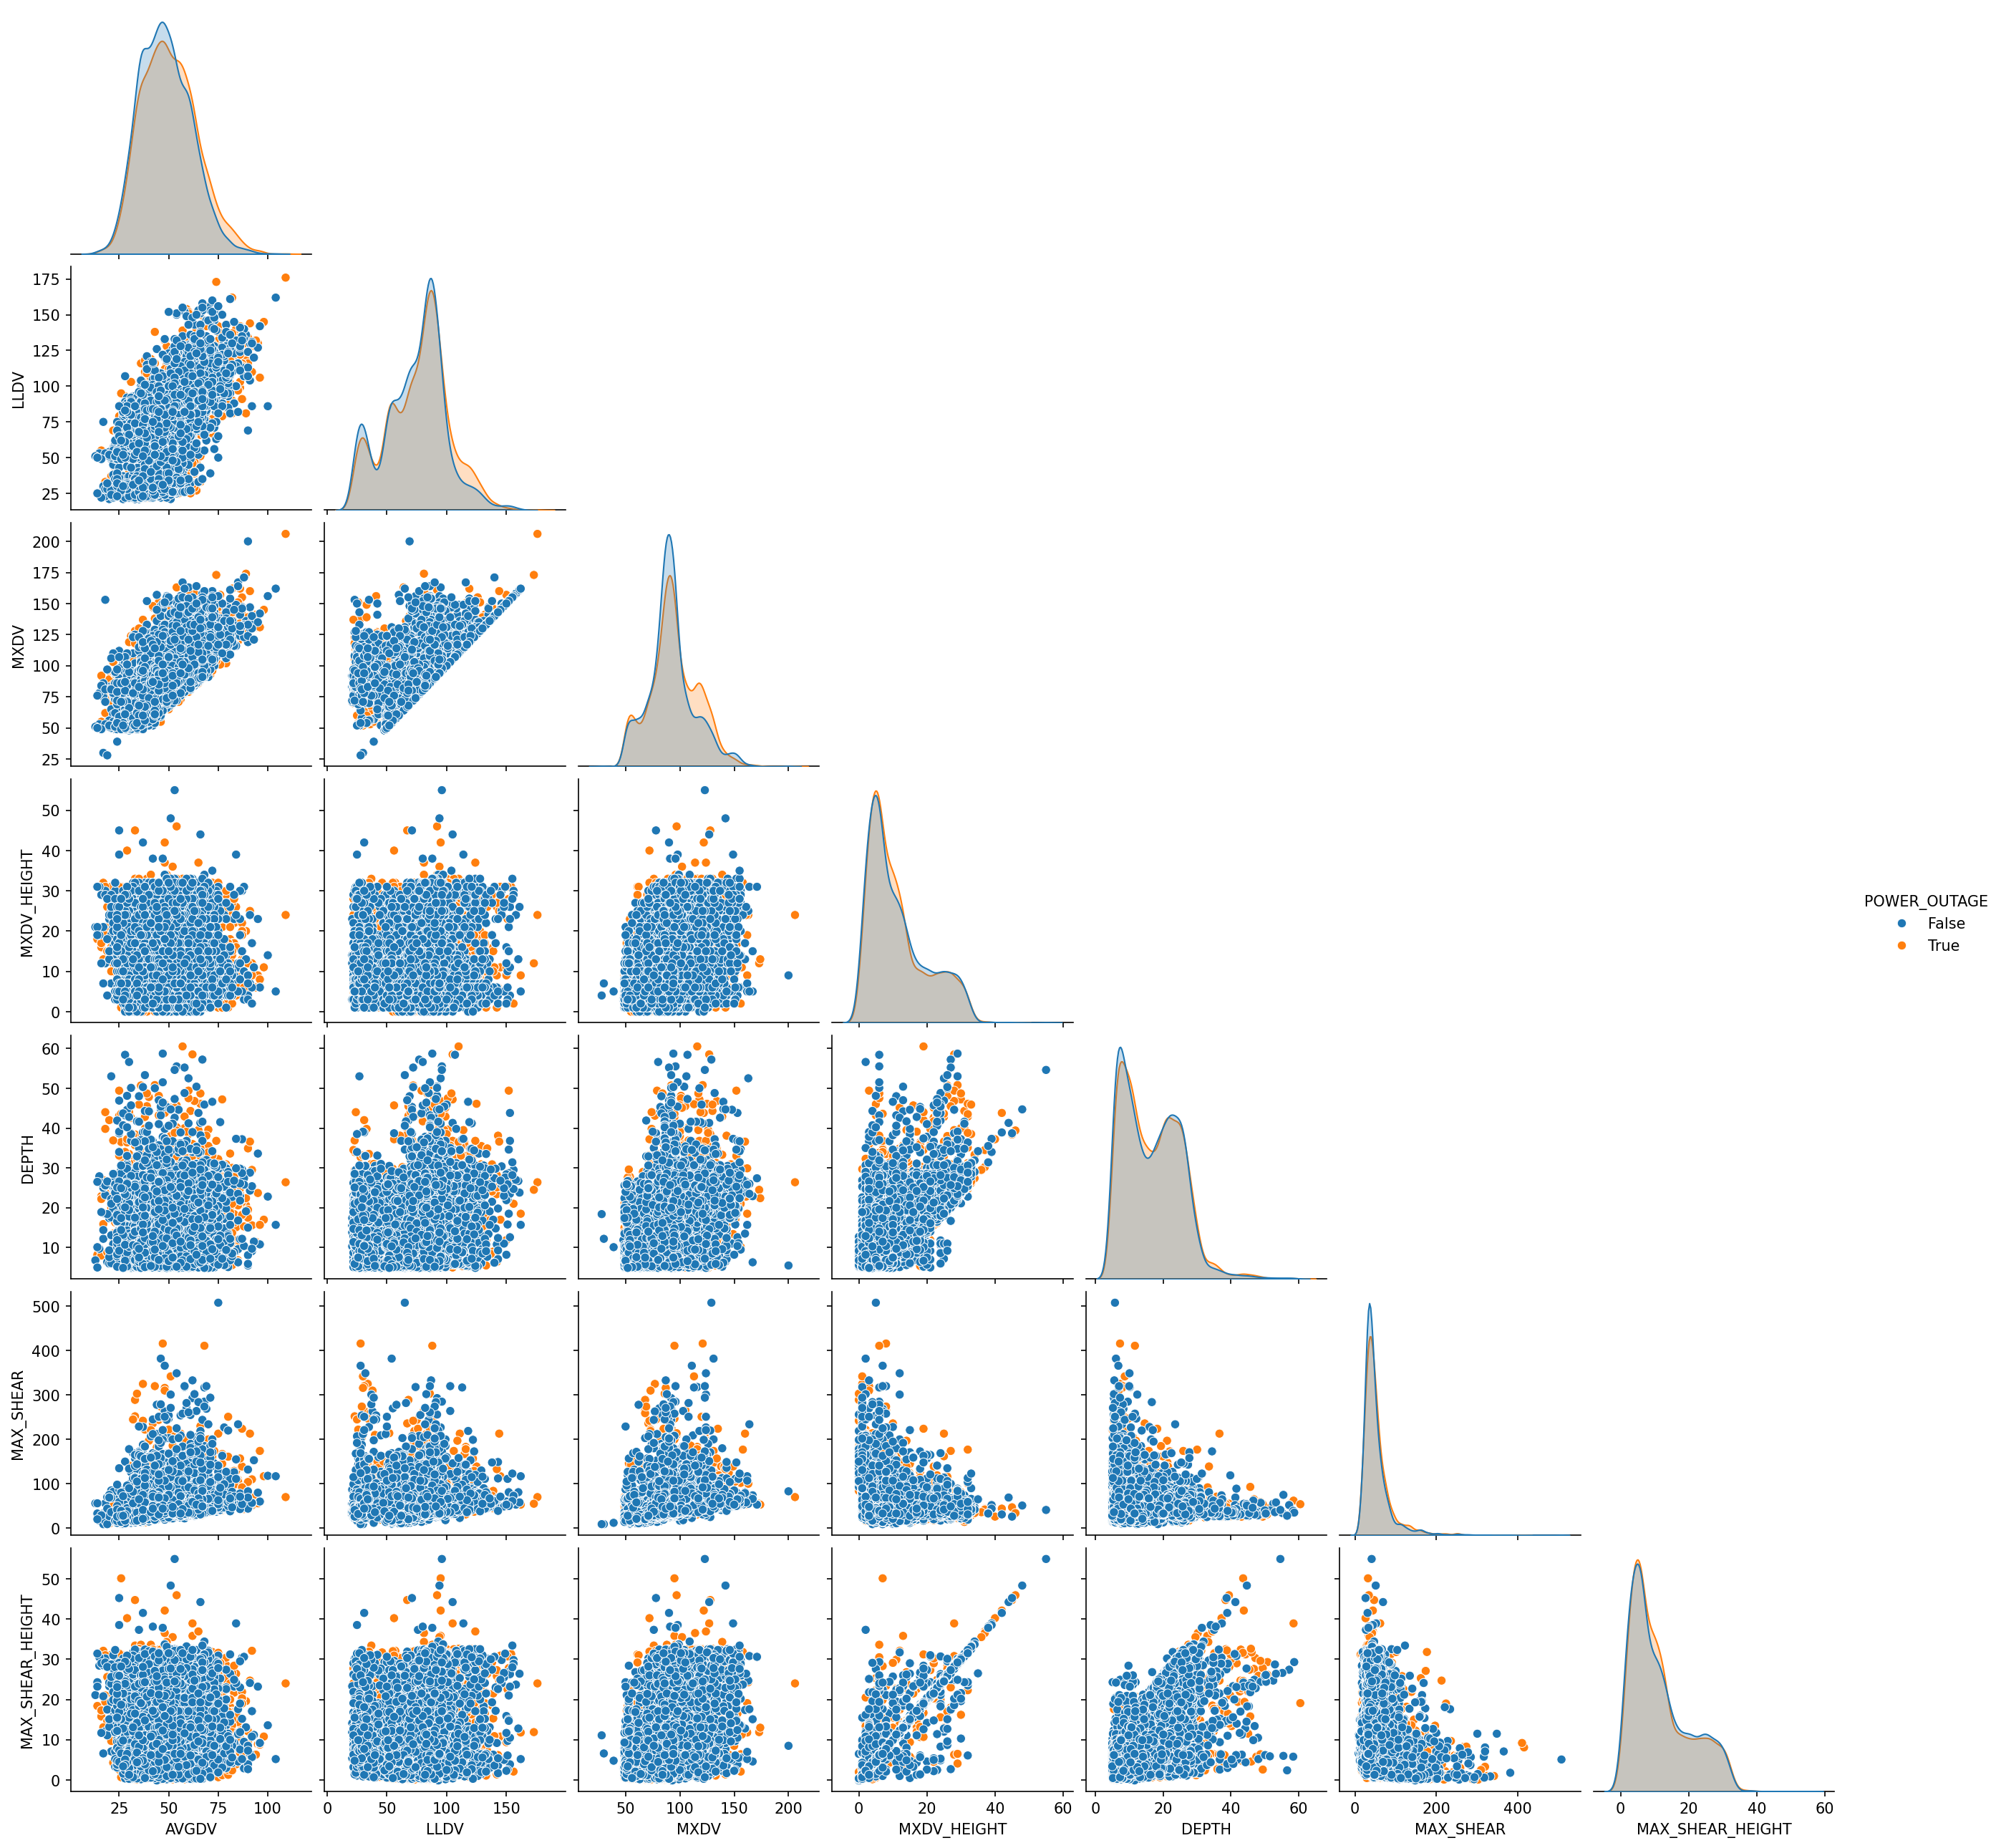

In [8]:
sns.pairplot(tornados_balanced, x_vars=['AVGDV', 'LLDV', 'MXDV', 'MXDV_HEIGHT', 'DEPTH', 'MAX_SHEAR','MAX_SHEAR_HEIGHT'],
                       y_vars=['AVGDV', 'LLDV', 'MXDV', 'MXDV_HEIGHT', 'DEPTH', 'MAX_SHEAR','MAX_SHEAR_HEIGHT'],
                       hue='POWER_OUTAGE', corner=True)